In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fibre_properties.csv")

In [2]:
data.head()

,Sr.No,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex)
0,1,28.32,49.6,4.18,22.25,5.32,36.91
1,2,27.98,49.6,3.80,21.84,5.60,36.91
2,3,28.53,48.0,4.50,22.17,6.30,36.91
3,4,29.58,50.0,4.24,22.17,5.38,36.91
4,5,29.20,50.5,4.25,22.27,5.30,36.91


In [3]:
pd.set_option('display.max_columns',None)
data.head()

,Sr.No,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex)
0,1,28.32,49.6,4.18,22.25,5.32,36.91
1,2,27.98,49.6,3.80,21.84,5.60,36.91
2,3,28.53,48.0,4.50,22.17,6.30,36.91
3,4,29.58,50.0,4.24,22.17,5.38,36.91
4,5,29.20,50.5,4.25,22.27,5.30,36.91


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sr.No                     20 non-null     int64  
 1   2.5% span length (mm)     20 non-null     float64
 2   UR (%)                    20 non-null     float64
 3   Fineness (ug/inch)        20 non-null     float64
 4   Bundle Strength (cN/tex)  20 non-null     float64
 5   Trash content (%)         20 non-null     float64
 6   Yarn Count (tex)          20 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.2 KB


In [5]:
data["Yarn Count (tex)"].value_counts()

28.80    8
36.91    6
29.53    6
Name: Yarn Count (tex), dtype: int64

In [6]:
data.shape

(20, 7)

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Sr.No                       0
2.5% span length (mm)       0
UR (%)                      0
Fineness (ug/inch)          0
Bundle Strength (cN/tex)    0
Trash content (%)           0
Yarn Count (tex)            0
dtype: int64

In [9]:
data.corr()

,Sr.No,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex)
Sr.No,1.000000,-0.866484,-0.745321,0.814958,-0.888196,0.850603,-0.834257
2.5% span length (mm),-0.866484,1.000000,0.873845,-0.836474,0.928792,-0.928949,0.623695
UR (%),-0.745321,0.873845,1.000000,-0.734053,0.799854,-0.824903,0.537202
Fineness (ug/inch),0.814958,-0.836474,-0.734053,1.000000,-0.907985,0.933666,-0.545374
Bundle Strength (cN/tex),-0.888196,0.928792,0.799854,-0.907985,1.000000,-0.983654,0.652219
Trash content (%),0.850603,-0.928949,-0.824903,0.933666,-0.983654,1.000000,-0.605532
Yarn Count (tex),-0.834257,0.623695,0.537202,-0.545374,0.652219,-0.605532,1.000000


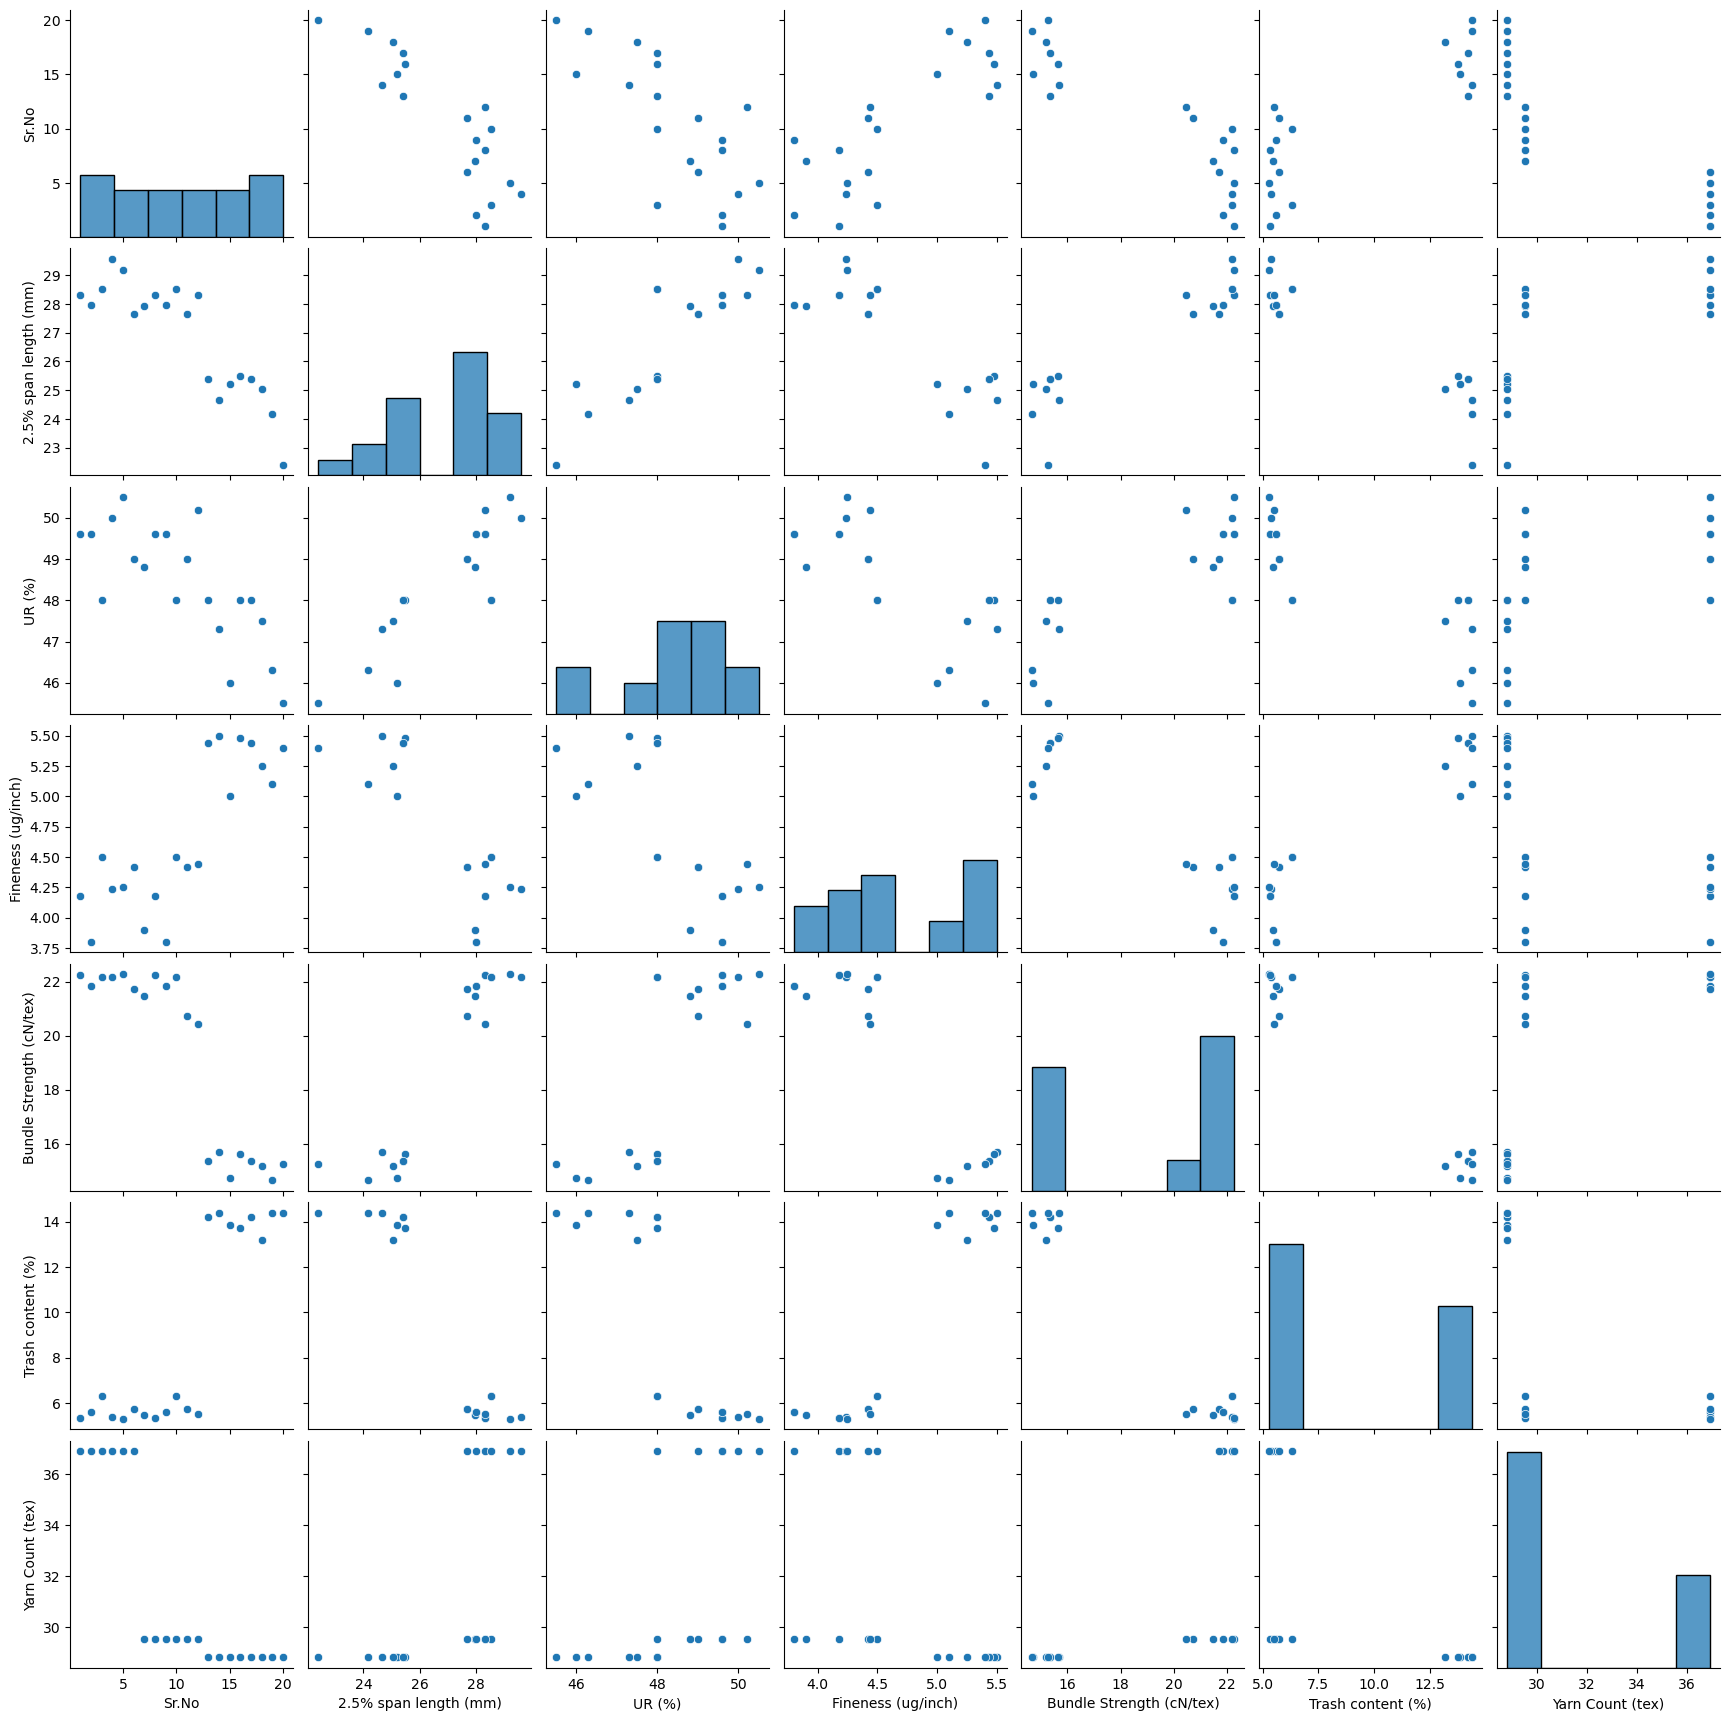

In [10]:
import seaborn as sns
sns.pairplot(data)

In [14]:
plt.scatter(data["2.5% span length (mm)"],data["Yarn Count (tex)"])

In [30]:
import seaborn as sns
sns.regplot(x="2.5% span length (mm)",y="Yarn Count (tex)",data=data)


<AxesSubplot:xlabel='2.5% span length (mm)', ylabel='Yarn Count (tex)'>

In [31]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [32]:
x.head()

,Sr.No,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%)
0,1,28.32,49.6,4.18,22.25,5.32
1,2,27.98,49.6,3.80,21.84,5.60
2,3,28.53,48.0,4.50,22.17,6.30
3,4,29.58,50.0,4.24,22.17,5.38
4,5,29.20,50.5,4.25,22.27,5.30


In [33]:
y.head()

0    36.91
1    36.91
2    36.91
3    36.91
4    36.91
Name: Yarn Count (tex), dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [35]:
x_train

,Sr.No,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%)
11,12,28.32,50.2,4.44,20.44,5.52
3,4,29.58,50.0,4.24,22.17,5.38
18,19,24.17,46.3,5.10,14.65,14.40
16,17,25.40,48.0,5.44,15.36,14.20
13,14,24.67,47.3,5.50,15.70,14.40
2,3,28.53,48.0,4.50,22.17,6.30
9,10,28.53,48.0,4.50,22.17,6.30
19,20,22.40,45.5,5.40,15.25,14.40
4,5,29.20,50.5,4.25,22.27,5.30
12,13,25.40,48.0,5.44,15.36,14.20


In [36]:
x_test

,Sr.No,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%)
0,1,28.32,49.6,4.18,22.25,5.32
17,18,25.05,47.5,5.25,15.19,13.18
15,16,25.48,48.0,5.48,15.63,13.75
1,2,27.98,49.6,3.80,21.84,5.60
8,9,27.98,49.6,3.80,21.84,5.60
5,6,27.67,49.0,4.42,21.71,5.73


In [37]:
y_test

0     36.91
17    28.80
15    28.80
1     36.91
8     29.53
5     36.91
Name: Yarn Count (tex), dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
x_train=scaler.fit_transform(x_train)

In [40]:
x_test=scaler.transform(x_test)

In [41]:
x_train


array([[ 0.13623422,  0.7096607 ,  1.30015225, -0.55407407,  0.46660012,
        -0.89795832],
       [-1.38958903,  1.30154793,  1.16825275, -0.92790718,  0.99321031,
        -0.93084319],
       [ 1.47132957, -1.23980913, -1.27188807,  0.67957519, -1.29586984,
         1.18788208],
       [ 1.08987375, -0.66201445, -0.15074229,  1.31509147, -1.07974659,
         1.14090369],
       [ 0.51769003, -1.00493324, -0.61239055,  1.4272414 , -0.97625094,
         1.18788208],
       [-1.58031694,  0.80830858, -0.15074229, -0.44192414,  0.99321031,
        -0.71474261],
       [-0.24522159,  0.80830858, -0.15074229, -0.44192414,  0.99321031,
        -0.71474261],
       [ 1.66205747, -2.07126975, -1.79948609,  1.24032485, -1.11323047,
         1.18788208],
       [-1.19886113,  1.12304226,  1.49800151, -0.90921552,  1.02365021,
        -0.94963454],
       [ 0.32696213, -0.66201445, -0.15074229,  1.31509147, -1.07974659,
         1.14090369],
       [-0.62667741,  0.7096607 ,  0.90445374, -1.

In [42]:
x_test

array([[-1.96177275,  0.7096607 ,  0.90445374, -1.04005711,  1.01756223,
        -0.9449367 ],
       [ 1.28060166, -0.82642757, -0.48049105,  0.95995002, -1.13149441,
         0.90131391],
       [ 0.89914585, -0.62443431, -0.15074229,  1.38985809, -0.99755887,
         1.03520232],
       [-1.77104485,  0.5499451 ,  0.90445374, -1.75034002,  0.89275865,
        -0.87916696],
       [-0.4359495 ,  0.5499451 ,  0.90445374, -1.75034002,  0.89275865,
        -0.87916696],
       [-1.00813322,  0.40432206,  0.50875523, -0.59145738,  0.85318679,
        -0.84863101]])

In [56]:
from sklearn.linear_model import LinearRegression

In [58]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [59]:
###print the coefficients 
print(regression.coef_)

[-3.68678633 -0.44832776 -0.03657852  1.03780712  0.05564471 -0.02158269]


In [60]:
print(regression.intercept_)

30.79857142857143


In [54]:
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [61]:
###prediction with test data

reg_pred=regression.predict(x_test)

In [94]:
reg_pred


array([36.67760178, 27.37918132, 29.13363128, 35.30053288, 30.37832161,
       33.76743728])

In [66]:
plt.scatter(y_test,reg_pred)

In [66]:
residuals = y_test-reg_pred

In [68]:
residuals


0     0.232398
17    1.420819
15   -0.333631
1     1.609467
8    -0.848322
5     3.142563
Name: Yarn Count (tex), dtype: float64

In [67]:
sns.displot(residuals,kind="kde")

In [69]:
plt.scatter(reg_pred,residuals)

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

1.2645332721688873
2.5616298195595366
1.600509237573947


In [73]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.8350562349637458


In [75]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

1.824718825181271

In [110]:
x_train.reshape(-1, 1)

array([[ 0.13623422],
       [ 0.7096607 ],
       [ 1.30015225],
       [-0.55407407],
       [ 0.46660012],
       [-0.89795832],
       [-1.38958903],
       [ 1.30154793],
       [ 1.16825275],
       [-0.92790718],
       [ 0.99321031],
       [-0.93084319],
       [ 1.47132957],
       [-1.23980913],
       [-1.27188807],
       [ 0.67957519],
       [-1.29586984],
       [ 1.18788208],
       [ 1.08987375],
       [-0.66201445],
       [-0.15074229],
       [ 1.31509147],
       [-1.07974659],
       [ 1.14090369],
       [ 0.51769003],
       [-1.00493324],
       [-0.61239055],
       [ 1.4272414 ],
       [-0.97625094],
       [ 1.18788208],
       [-1.58031694],
       [ 0.80830858],
       [-0.15074229],
       [-0.44192414],
       [ 0.99321031],
       [-0.71474261],
       [-0.24522159],
       [ 0.80830858],
       [-0.15074229],
       [-0.44192414],
       [ 0.99321031],
       [-0.71474261],
       [ 1.66205747],
       [-2.07126975],
       [-1.79948609],
       [ 1

In [114]:
regression.predict(x_train)

array([29.4009089 , 34.40780458, 26.58398031, 28.3628585 , 30.7641391 ,
       35.88005003, 30.95783876, 26.86498582, 33.79409658, 31.17555065,
       31.75539051, 30.23497266, 28.99687789, 32.00054572])

In [119]:
import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [120]:
pickled_model.predict(x_train)

array([29.4009089 , 34.40780458, 26.58398031, 28.3628585 , 30.7641391 ,
       35.88005003, 30.95783876, 26.86498582, 33.79409658, 31.17555065,
       31.75539051, 30.23497266, 28.99687789, 32.00054572])